# notebook
### Só para você ver os outputs mais facil


---------------------------------------------

cabecalho: 

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0  

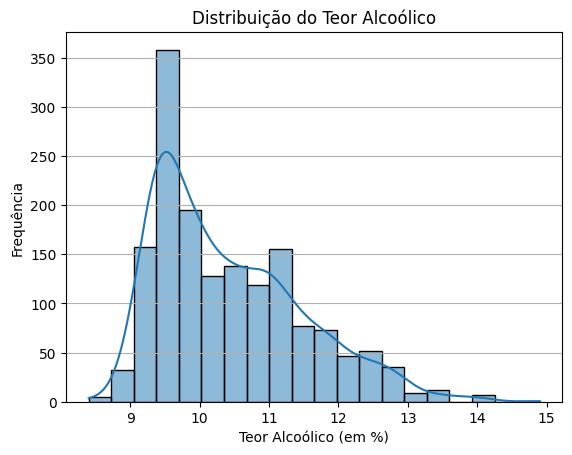

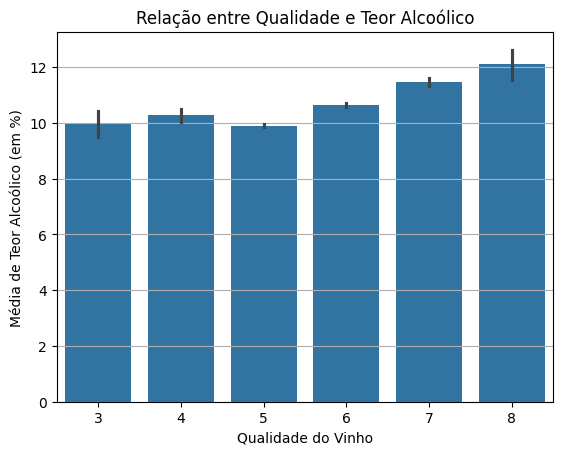

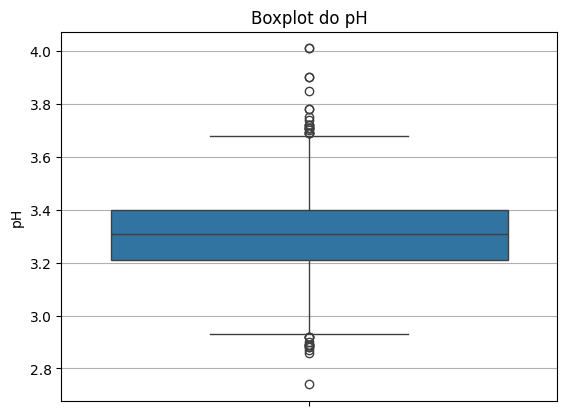


---------------------------------------------

Frequência da variável Qualidade

quality
3     10
4     53
5    681
6    638
7    199
8     18
Name: count, dtype: int64

---------------------------------------------


---------------------------------------------

Matriz de Correlação

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.256131     0.671703   
volatile acidity          -0.256131          1.000000    -0.552496   
citric acid                0.671703         -0.552496     1.000000   
residual sugar             0.114777          0.001918     0.143577   
chlorides                  0.093705          0.061298     0.203823   
free sulfur dioxide       -0.153794         -0.010504    -0.060978   
total sulfur dioxide      -0.113181          0.076470     0.035533   
density                    0.668047          0.022026     0.364947   
pH                        -0.682978          0.234937    -0.541904   
sulphates   

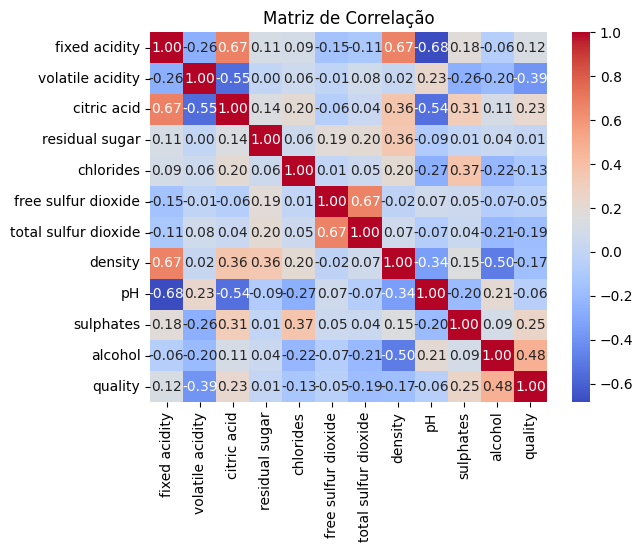

como visto anteriormente, um vinho com mais alcool, tem uma qualidade reportada maior.

As variaveis que mais impactam positivamente são o alcool, os sulfatos e o acido citrico

as variaveis que impactam negativamente são a volatilidade da acides, o total de dioxido de sulfur e a densidade


---------------------------------------------

Faz mais sentido usar o numpy para dados puramente numericos e calculos mais complexos

O pandas é melhor para dados tambulares (como csv), para limpar dados e explorar e visualizar eles indivualmente pelo dataframe (selecionando colunas). 


<Figure size 640x480 with 0 Axes>

In [2]:
#Nome: Victor Augusto de Aquino Silvério
# atividade wine quality

# Bibliotecas

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# carrega o dataset e muda o separador do csv (padrão ",", mas o wine é ";")
path = r'C:\Users\victo\Python_Senai390\Semana_4\atividade_wine\data\winequality-red.csv' #desculpe pelo hardcoded, mas ele não queria executar só pelo path relativo. Mas como é só para ver a saida, é mais tranquilo.
df_vinhos = pd.read_csv(path, sep=';')
#Pergunta 1: Usei o pandas pois ele é adequado para dados tabulares, numpy é melhor só para operações matematicas e arrays 'puros'

# Visualização do cabeçalho:

print("\n" + "---"*15 + "\n")
print("cabecalho: \n")
print(df_vinhos.head())
print("\n" + "---"*15 + "\n")

# dimensão do dataset

num_linhas, num_colunas = df_vinhos.shape # fica melhor, e dá pra usar mais tarde as variaveis

print("\n" + "---"*15 + "\n")
print(f"O dataset possui {num_linhas} linhas e {num_colunas} colunas")
print("\n" + "---"*15 + "\n")

#colunas no dataset
print("\n" + "---"*15 + "\n")
print("As colunas do dataset são:")
for coluna in df_vinhos.columns: #aprendi na unifei
    print(f"- {coluna}")
print("\n" + "---"*15 + "\n")

#pergunta 2: Mostra as composições quimicas/fisicas dos vinhos, além de uma 'nota', a coluna quality

print("\n" + "---"*15 + "\n")
media_alcool_pandas = df_vinhos['alcohol'].mean()
print(f"A média do teor alcoólico com Pandas é: {media_alcool_pandas:.2f}")
print("\n" + "---"*15 + "\n")

print("\n" + "---"*15 + "\n")
media_alcool_numpy = np.mean(df_vinhos['alcohol'])
print(f"A média do teor alcoólico com Numpy é: {media_alcool_numpy:.2f}")
print("\n" + "---"*15 + "\n")

print("\n" + "---"*15 + "\n")
print("Os resultados são idênticos.") #vi no terminal e escrevi aqui, preguiça de fazer if & else
print("\n" + "---"*15 + "\n")

#pergunta 3: usaria o pandas, pois ele já está sendo como principal nesse caso de uso. Mas em estruturas completamente de números, o numpy seria mais efetivo (e tem mais funções nesse ambito)

# valores nulos/faltantes:
valores_faltantes = df_vinhos.isnull().sum()

print("\n" + "---"*15 + "\n")
if valores_faltantes.sum() == 0:
    print("Não há valores nulos no dataset.")
else:
    print("Valores faltantes por coluna:")
    print(valores_faltantes)
print("\n" + "---"*15 + "\n")

# pergunta 4: eu prefiro a '.dropna', mas a função de preencher também é util. 

# Graficos solicitados:

#distribuição de "alcohol"
sns.histplot(df_vinhos['alcohol'], kde=True, bins=20)
plt.title('Distribuição do Teor Alcoólico')
plt.xlabel('Teor Alcoólico (em %)')
plt.ylabel('Frequência')
plt.grid(axis='y')
plt.show()
plt.clf()

#relação entre álcool e qualidade do vinho
sns.barplot(x='quality', y='alcohol', data=df_vinhos)
plt.title('Relação entre Qualidade e Teor Alcoólico')
plt.xlabel('Qualidade do Vinho')
plt.ylabel('Média de Teor Alcoólico (em %)')
plt.grid(axis='y')
plt.show()
plt.clf()

#boxplot para verificar outliers no pH
sns.boxplot(y=df_vinhos['pH'])
plt.title('Boxplot do pH')
plt.ylabel('pH')
plt.grid(axis='y')
plt.show()
plt.clf()

# pergunta 5: sobre os graficos:
'''
O histograma mostra que a maioria dos vinhos tem teor alcoólico de 9% á 11%.
O gráfico de barras mostra que quanto maior o nível de alcool, maior a qualidade.
O boxplot do pH facilita visualizar a mediana, os quartis e identificar os outliers. no caso especifico, deu pra ver 2 outliers, um superior e um inferior.
'''

print("\n" + "---"*15 + "\n")
print("Frequência da variável Qualidade\n")
frequencia_qualidade = df_vinhos['quality'].value_counts().sort_index()
print(frequencia_qualidade)
print("\n" + "---"*15 + "\n")

print("\n" + "---"*15 + "\n")
print("Matriz de Correlação\n")
matriz_correlacao = df_vinhos.corr()
print(matriz_correlacao)
print("\n" + "---"*15 + "\n")

# plotando a matriz de correlação
sns.heatmap(matriz_correlacao, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()
plt.clf()

# Conclusão

print("como visto anteriormente, um vinho com mais alcool, tem uma qualidade reportada maior.\n")
print("As variaveis que mais impactam positivamente são o alcool, os sulfatos e o acido citrico\n")
print("as variaveis que impactam negativamente são a volatilidade da acides, o total de dioxido de sulfur e a densidade\n")

print("\n" + "---"*15 + "\n")

print("Faz mais sentido usar o numpy para dados puramente numericos e calculos mais complexos\n")
print("O pandas é melhor para dados tambulares (como csv), para limpar dados e explorar e visualizar eles indivualmente pelo dataframe (selecionando colunas). ")
